CS422 Final Project - Jaken Whipp

https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419/2

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('../input/phishingdata/PhishingData.arff')
df = pd.DataFrame(data[0])

df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB


In [4]:
df.Result.value_counts()

b'-1'    702
b'1'     548
b'0'     103
Name: Result, dtype: int64

-1 Represents phising, 1 represents legitamate, 0 represents suspicious

Replacing values so they are numeric and not b'-1', b'1', and b'0'.
https://sparkbyexamples.com/pandas/pandas-replace-by-examples/#:~:text=DataFrame.,object%20and%20returns%20None%20value.

In [5]:
df.replace(b'-1', -1, inplace = True)
df.replace(b'1', 1, inplace = True)
df.replace(b'0', 0, inplace = True)

In [6]:
df.Result.value_counts()

-1    702
 1    548
 0    103
Name: Result, dtype: int64

In [7]:
X = df.values[:, 0:9]
Y = df.values[:, 9]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [9]:
gdtree = DecisionTreeClassifier(criterion="gini")
gdtree = gdtree.fit(X_train, Y_train)

In [10]:
gini_res_pred = gdtree.predict(X_test)

In [11]:
print("Accuracy is", accuracy_score(Y_test, gini_res_pred)*100)

Accuracy is 86.94581280788178


[Text(0.48504298327137546, 0.9642857142857143, 'X[0] <= 0.5\ngini = 0.556\nsamples = 947\nvalue = [510, 72, 365]'),
 Text(0.15456552044609664, 0.8928571428571429, 'X[2] <= -0.5\ngini = 0.367\nsamples = 400\nvalue = [46, 42, 312]'),
 Text(0.04460966542750929, 0.8214285714285714, 'X[1] <= 0.5\ngini = 0.049\nsamples = 160\nvalue = [4, 0, 156]'),
 Text(0.03717472118959108, 0.75, 'X[3] <= 0.5\ngini = 0.025\nsamples = 158\nvalue = [2, 0, 156]'),
 Text(0.022304832713754646, 0.6785714285714286, 'X[6] <= 0.5\ngini = 0.013\nsamples = 149\nvalue = [1, 0, 148]'),
 Text(0.01486988847583643, 0.6071428571428571, 'gini = 0.0\nsamples = 117\nvalue = [0, 0, 117]'),
 Text(0.02973977695167286, 0.6071428571428571, 'X[1] <= -0.5\ngini = 0.061\nsamples = 32\nvalue = [1, 0, 31]'),
 Text(0.022304832713754646, 0.5357142857142857, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.03717472118959108, 0.5357142857142857, 'X[8] <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [1, 0, 12]'),
 Text(0.0297397769516728

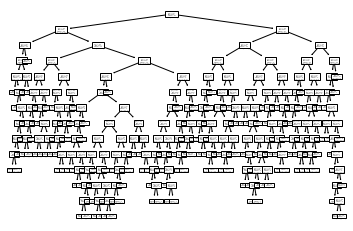

In [12]:
tree.plot_tree(gdtree)